<a href="https://colab.research.google.com/github/AmanPriyanshu/Machine-Learning-Supervised/blob/master/Population_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data: 
citation: https://censusindia.gov.in/Census_Data_2001/India_at_glance/variation.aspx

<br>

1981:	716,493,000

1982:	733,152,000	

1983:	750,034,000	

1984:	767,147,000	

1985:	784,491,000	

1986:	802,052,000	

1987:	819,800,000	

1988:	837,700,000	

1989:	855,707,000	

1990:	873,785,000	

1991:	891,910,000	

1992:	910,065,000		

1993:	928,226,000		

1994:	946,373,000	

1995:	964,486,000		
	
1996:	982,553,000	

1997:	1,000,558,000	

1998:	1,018,471,000	

1999:	1,036,259,000	

2000:	1,053,898,000	
	
2001:	1,071,374,000	

2002:	1,088,694,000	

2003:	1,105,886,000	

2004:	1,122,991,000	

2005:	1,140,043,000	

2006:	1,157,039,000	

2007:	1,134,024,000	

2008:	1,150,196,000	

2009:	1,166,228,000	

2010:	1,182,108,000	

2011:	1,197,658,000	

2012:	1,212,827,000	

2013:	1,227,012,000	
	
2014:	1,243,542,000	

2015:	1,259,108,000	

2016:	1,273,986,000	

2017:	1,288,522,000	

In [0]:
population_every_year = {
1981: 716493000,

1982: 733152000,

1983: 750034000,

1984: 767147000,

1985: 784491000,

1986: 802052000,

1987: 819800000,

1988: 837700000,

1989: 855707000,

1990: 873785000,

1991: 891910000,

1992: 910065000,

1993: 928226000,

1994: 946373000,

1995: 964486000,

1996: 982553000,

1997: 1000558000,

1998: 1018471000,

1999: 1036259000,

2000: 1053898000,

2001: 1071374000,

2002: 1088694000,

2003: 1105886000,

2004: 1122991000,

2005: 1140043000,

2006: 1157039000,

2007: 1134024000,

2008: 1150196000,

2009: 1166228000,

2010: 1182108000,

2011: 1197658000,

2012: 1212827000,

2013: 1227012000,

2014: 1243542000,

2015: 1259108000,

2016: 1273986000,

2017: 1288522000,
}

### Creating A Dataset For Populations:

In [3]:
populations_prev = []
for year in range(1981, 2015):
  populations_prev.append([population_every_year[year]/2000000000 , population_every_year[year + 1]/2000000000 , population_every_year[year + 2]/2000000000])

populations_prev = np.array(populations_prev)
print(populations_prev)
np.random.seed(1)
np.random.shuffle(populations_prev)

populations_pred = []
for year in range(1984, 2018):
  populations_pred.append(population_every_year[year])

populations_pred = np.array(populations_pred)/2000000000
print(populations_pred)
np.random.seed(1)
np.random.shuffle(populations_pred)

[[0.3582465 0.366576  0.375017 ]
 [0.366576  0.375017  0.3835735]
 [0.375017  0.3835735 0.3922455]
 [0.3835735 0.3922455 0.401026 ]
 [0.3922455 0.401026  0.4099   ]
 [0.401026  0.4099    0.41885  ]
 [0.4099    0.41885   0.4278535]
 [0.41885   0.4278535 0.4368925]
 [0.4278535 0.4368925 0.445955 ]
 [0.4368925 0.445955  0.4550325]
 [0.445955  0.4550325 0.464113 ]
 [0.4550325 0.464113  0.4731865]
 [0.464113  0.4731865 0.482243 ]
 [0.4731865 0.482243  0.4912765]
 [0.482243  0.4912765 0.500279 ]
 [0.4912765 0.500279  0.5092355]
 [0.500279  0.5092355 0.5181295]
 [0.5092355 0.5181295 0.526949 ]
 [0.5181295 0.526949  0.535687 ]
 [0.526949  0.535687  0.544347 ]
 [0.535687  0.544347  0.552943 ]
 [0.544347  0.552943  0.5614955]
 [0.552943  0.5614955 0.5700215]
 [0.5614955 0.5700215 0.5785195]
 [0.5700215 0.5785195 0.567012 ]
 [0.5785195 0.567012  0.575098 ]
 [0.567012  0.575098  0.583114 ]
 [0.575098  0.583114  0.591054 ]
 [0.583114  0.591054  0.598829 ]
 [0.591054  0.598829  0.6064135]
 [0.598829

### Visulazing Our Data:

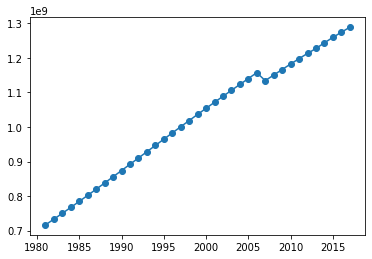

In [4]:
plt.plot( np.array([year for year in range(1981, 2018)]), np.array([population_every_year[year] for year in range(1981, 2018)]), '-o')
plt.show()

By the end of 2017 we can easily see the population approach 1.3 * 10^9 so,

1,300,000,000 which is actually: 1288522000

## Creating A Model

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(3, activation='relu'),
                                    tf.keras.layers.Dense(6, activation='relu'),
                                    #tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(3, activation='relu'),
                                    #tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(1, activation='elu'),
])

#### Callback

In [0]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('mae') < 0.007):   
          print("\nReached %2.2f%% mean absolute error, so stopping training!!" %(0.01))   
          self.model.stop_training = True

callbacks = myCallback()

### Compiling and Fitting the Model

In [7]:
model.compile(loss='mae', optimizer='sgd', metrics='mae')

history = model.fit(populations_prev, populations_pred,
                    epochs=1000,
                    callbacks=[callbacks]
                    )

Epoch 1/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2161 - mae: 0.2161
Epoch 2/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1651 - mae: 0.1651
Epoch 3/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1131 - mae: 0.1131
Epoch 4/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0581 - mae: 0.0581
Epoch 5/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0152 - mae: 0.0152
Epoch 6/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0150 - mae: 0.0150
Epoch 7/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0148 - mae: 0.0148
Epoch 8/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0146 - mae: 0.0146
Epoch 9/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0144 - mae: 0.0144
Epoch 10/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0143 - mae: 0.0143
Epoch 11/1000
2/2 [==============================] - 0s 2ms/step - lo

### Plotting MAE against ITERATIONS graph:

dict_keys(['loss', 'mae'])


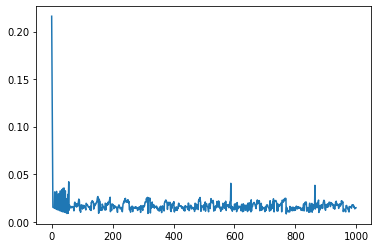

In [8]:
print(history.history.keys())
plt.plot(history.history['mae'])
plt.show()

### Predicting Population of 2017

In [9]:
pred_2017 = model.predict(np.array([[0.621771,  0.629554,  0.636993]]))

print(int(pred_2017[0][0]*2000000000)) 

1300101995


#### Let's visualise

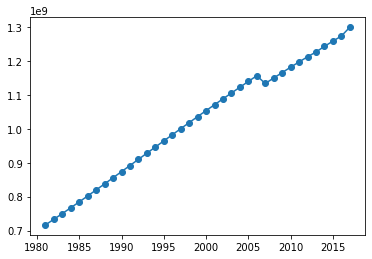

In [10]:
plt.plot( np.array([year for year in range(1981, 2018)]), np.array([population_every_year[year] for year in range(1981, 2017)]+[pred_2017*2000000000]), '-o')
plt.show()

As can be seen there is a slight deviation from the above true value of 2017, however they are very close. We will be discarding this value since we already have the true values

### Predicting Population of 2018

In [11]:
pred_2018 = model.predict(np.array([[ 0.629554,  0.636993, pred_2017[0][0]]]))

print(int(pred_2018[0][0]*2000000000))

1314011812


#### Let's visualise

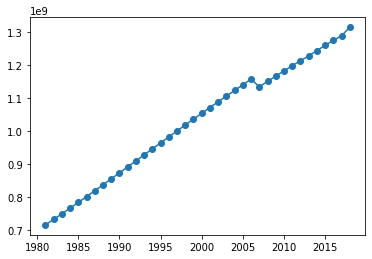

In [12]:
plt.plot( np.array([year for year in range(1981, 2019)]), np.array([population_every_year[year] for year in range(1981, 2018)]+[pred_2018*2000000000]), '-o')
plt.show()

### Predicting Population of 2019

In [13]:
pred_2019 = model.predict(np.array([[ 0.629554, pred_2017[0][0], pred_2018[0][0]]]))

print(int(pred_2019[0][0]*2000000000))

1327394962


#### Let's visualise

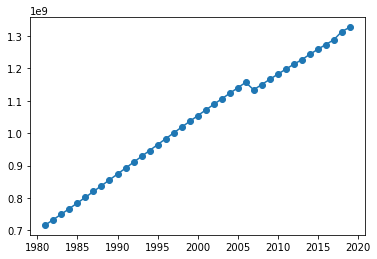

In [14]:
plt.plot( np.array([year for year in range(1981, 2020)]), np.array([population_every_year[year] for year in range(1981, 2018)]+[pred_2018*2000000000, pred_2019*2000000000]), '-o')
plt.show()

### Predicting Population of 2020

In [15]:
pred_2020 = model.predict(np.array([[ pred_2017[0][0], pred_2018[0][0], pred_2019[0][0]]]))

print(int(pred_2020[0][0]*2000000000))

1351172685


#### Let's visualise

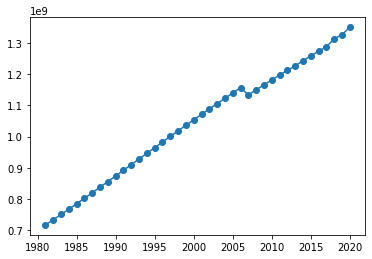

In [16]:
plt.plot( np.array([year for year in range(1981, 2021)]), np.array([population_every_year[year] for year in range(1981, 2018)]+[pred_2018*2000000000, pred_2019*2000000000, pred_2020*2000000000]), '-o')
plt.show()

### Predicting Population of 2020

In [17]:
pred_2021 = model.predict(np.array([[ pred_2018[0][0], pred_2019[0][0], pred_2020[0][0]]]))

print(int(pred_2021[0][0]*2000000000))

1363646507


Let's visualise

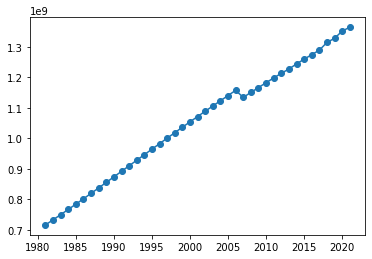

In [18]:
plt.plot( np.array([year for year in range(1981, 2022)]), np.array([population_every_year[year] for year in range(1981, 2018)]+[pred_2018*2000000000, pred_2019*2000000000, pred_2020*2000000000, pred_2021*2000000000]), '-o')
plt.show()